In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Define the column names from the documentation
column_names = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "target"
 ]

# Load directly from UCI URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

df_pre = pd.read_csv(url, names=column_names)

# Replace '?' with NaN
df_pre.replace("?", pd.NA, inplace=True)

# Convert all columns to numeric (auto-fixes columns with '?')
df_pre = df_pre.apply(pd.to_numeric, errors='coerce')

# Preview the data
df_pre.head()

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

| Column Name | Data Type         | Description                                                    | Possible Values                                                                                  |
| ----------- | ----------------- | -------------------------------------------------------------- | ------------------------------------------------------------------------------------------------ |
| `age`       | Integer           | Age of the patient in years                                    | Example: 29, 45, 77                                                                              |
| `sex`       | Categorical (int) | Sex of the patient                                             | 0 = female, 1 = male                                                                             |
| `cp`        | Categorical (int) | Chest pain type                                                | 0 = typical angina<br>1 = atypical angina<br>2 = non-anginal pain<br>3 = asymptomatic            |
| `trestbps`  | Integer           | Resting blood pressure (in mm Hg) on admission to the hospital | Example: 120, 140, 180                                                                           |
| `chol`      | Integer           | Serum cholesterol in mg/dl                                     | Example: 200, 240                                                                                |
| `fbs`       | Categorical (int) | Fasting blood sugar > 120 mg/dl                                | 0 = false, 1 = true                                                                              |
| `restecg`   | Categorical (int) | Resting electrocardiographic results                           | 0 = normal<br>1 = ST-T wave abnormality<br>2 = probable or definite left ventricular hypertrophy |
| `thalach`   | Integer           | Maximum heart rate achieved during exercise test               | Example: 150, 187                                                                                |
| `exang`     | Categorical (int) | Exercise-induced angina                                        | 0 = no, 1 = yes                                                                                  |
| `oldpeak`   | Float             | ST depression induced by exercise relative to rest             | Measured in depression units                                                                     |
| `slope`     | Categorical (int) | The slope of the peak exercise ST segment                      | 0 = upsloping<br>1 = flat<br>2 = downsloping                                                     |
| `ca`        | Categorical (int) | Number of major vessels (0–3) colored by fluoroscopy           | 0, 1, 2, 3 (can be missing in raw files)                                                         |
| `thal`      | Categorical (int) | Thalassemia test result                                        | 3 = normal<br>6 = fixed defect<br>7 = reversible defect (can be missing in raw files)            |
| `target`    | Integer           | Diagnosis of heart disease                                     | 0 = no disease<br>1-4 = presence of disease (will be binarized to 1 = has disease)                |


In [ ]:
df_pre['target'].value_counts()

target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

##### 'target' Column values meaning:
| Value | Meaning                           |
| ----- | --------------------------------- |
| **0** | No heart disease                 |
| **1** | Mild heart disease              |
| **2** | Moderate heart disease        |
| **3** | Serious heart disease           |
| **4** | Very serious heart disease  |


#### I'm going to convert them into binary (0,1)

In [ ]:
# Convert target to binary
df_pre["target"] = df_pre["target"].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df_pre['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64

In [ ]:
df_pre

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [ ]:
df_pre.dropna(inplace=True)

In [ ]:
df_pre.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
scaler = StandardScaler()

features = df_pre.drop('target', axis=1)

scaled_features = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

df_scaled['target'] = df_pre['target'].values

df_scaled.head()

### EDA:

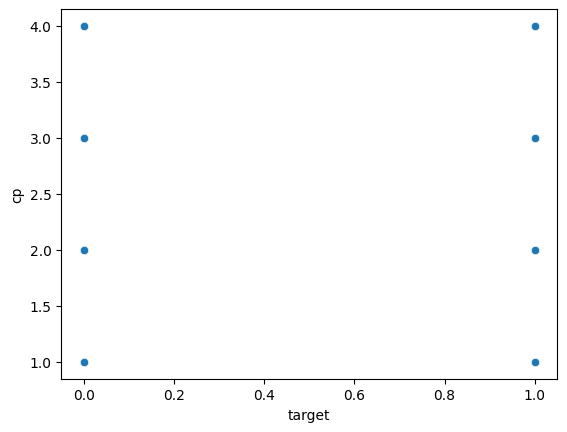

In [ ]:
sns.scatterplot(data=df_pre, x='target', y='cp')
plt.show()

In [ ]:
df_pre[['cp', 'target']].corr().loc['cp', 'target']

0.4089446866752392

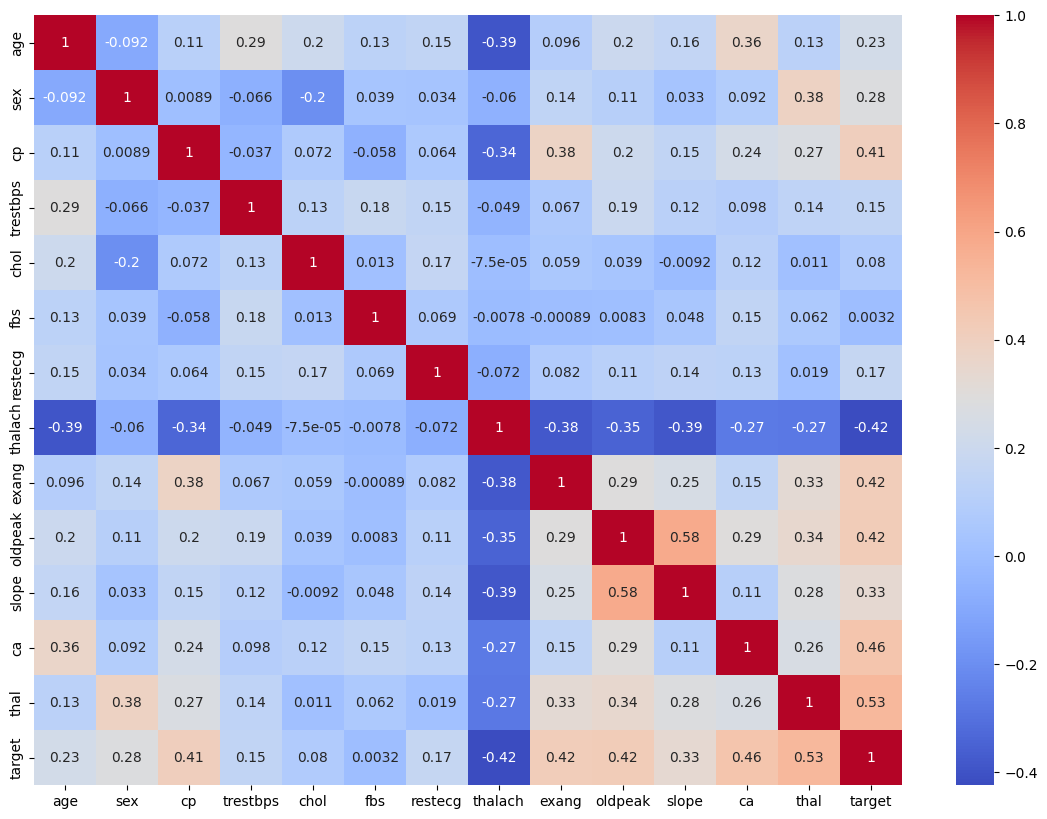

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_pre.corr(), annot=True, cmap='coolwarm')
plt.show()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,0
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,1
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,1
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,0
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,0


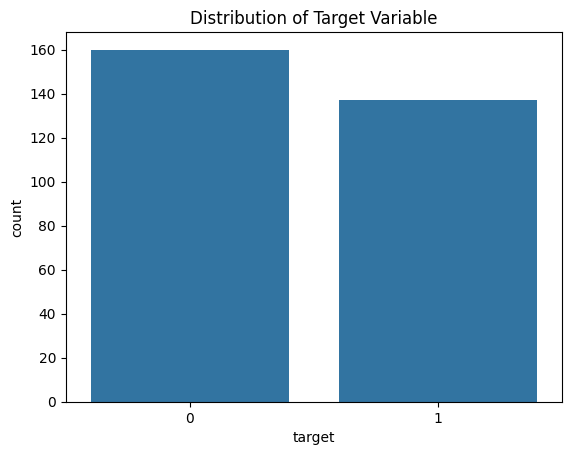

In [40]:
# Distribution of target variable
sns.countplot(x='target', data=df_scaled)
plt.title('Distribution of Target Variable')
plt.show()

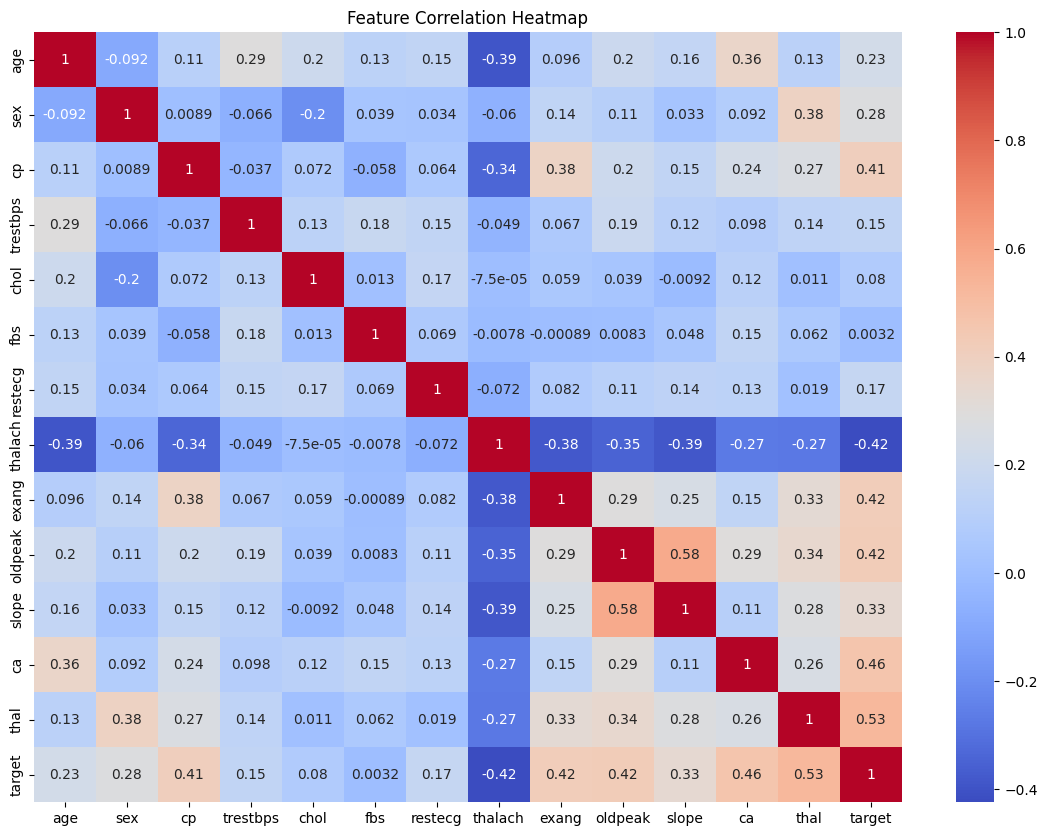

In [41]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


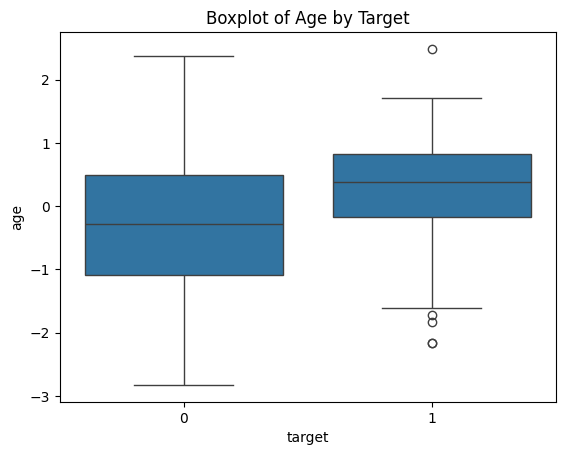

In [ ]:
sns.boxplot(x='target', y='age', data=df_scaled)
plt.title('Boxplot of Age by Target')
plt.show()
